#### $|O| = 2$ の場合のプロファイル空間(プロファイル平面) に関する図の作成

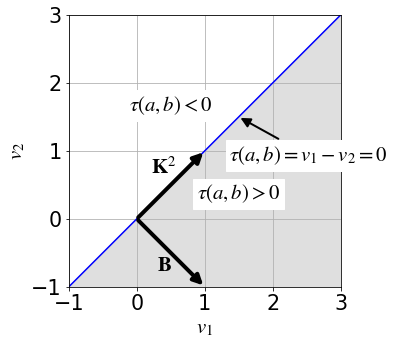

In [5]:
import numpy as np
# import itertools as it
import matplotlib.pyplot as plt
from IPython.display import display_markdown

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'
plt.rcParams['text.usetex']  = False # check win32/win64 if any error. "---! c:/texlive/2021/texmf-var/web2c/pdftex/latex.fmt made by different executable version, strings are different"
plt.rcParams['text.latex.preamble']  = (
    r'\usepackage{amsmath, amssymb}' + '\n' +
    r'\usepackage[fontsize=16]{scrextend}')
plt.rcParams['font.size']  = 12.0


def fn_line(l, x, y):
    return l[0]*x + l[1]*y + l[2]

v1p = np.linspace(-3.0, 3.0, 11)
v2p = np.linspace(-3.0, 3.0, 11)
v1, v2 = np.meshgrid(v1p, v2p)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.set_aspect('equal')
ax.set_xlim(-1.0, 3.0)
ax.set_ylim(-1.0, 3.0)
ax.set_xlabel('$v_1$', fontsize='xx-large')
ax.set_ylabel('$v_2$', fontsize='xx-large')
ax.grid()
# ax.set_xticks([])
# ax.set_yticks([])
line_tau_ab = np.array([1, -1, 0])

ax.contour(v1p, v2p, fn_line(line_tau_ab, v1, v2), levels=[0], colors=['blue'])
ax.contourf(v1p, v2p, fn_line(line_tau_ab, v1, v2), levels=[0, 10], colors=['#7f7f7f3f'])
# ax.contourf(v1p, v2p, fn_line(line_tau_ab, v1, v2), levels=[-10, 0], colors=['#9f9f9f7f'])

arrowprops = dict(mutation_scale=20,
                  linewidth=2,
                  arrowstyle='-|>',
                  color='k',
                  zorder=5)

ax.annotate(r'$\tau(a, b) = v_1 - v_2 = 0$', xy=(1.5, 1.5),
            xytext=(70, -50), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large',
            backgroundcolor='white', arrowprops=arrowprops)

ax.annotate(r'$\tau(a, b) > 0$', xy=(1.5, 0.2),
            xytext=(0, 0), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large',
            backgroundcolor='white')

ax.annotate(r'$\tau(a, b) < 0$', xy=(0.5, 1.5),
            xytext=(0, 0), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large',
            backgroundcolor='white')

vec_arrowprops = dict(mutation_scale=20,
                      linewidth=4,
                      arrowstyle='-|>',
                      color='k',
                      zorder=5)


ax.annotate(r'', xy=(1.0, 1.0), xytext=(0, 0),
            arrowprops=vec_arrowprops)

if plt.rcParams['text.usetex']:
    txt = r'$\boldsymbol{K}^2$'
else:
    txt = r'$\mathbf{K}^2$'

ax.annotate(txt, xy=(0.4, 0.6),
            xytext=(0, 0), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large')


ax.annotate(r'', xy=(1.0, -1.0), xytext=(0, 0),
            arrowprops=vec_arrowprops)

if plt.rcParams['text.usetex']:
    txt = r'$\boldsymbol{B}$'
else:
    txt = r'$\mathbf{B}$'

ax.annotate(txt, xy=(0.4, -0.6),
            xytext=(0, -15), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large')

# ax.set_frame_on(False)
plt.savefig('geom_profile_2d_plane.pdf', bbox_inches='tight')

#### 基本基底成分 $x \pmb{B}_a + y \pmb{B}_b$ とペア多数決の結果に関する図の作成

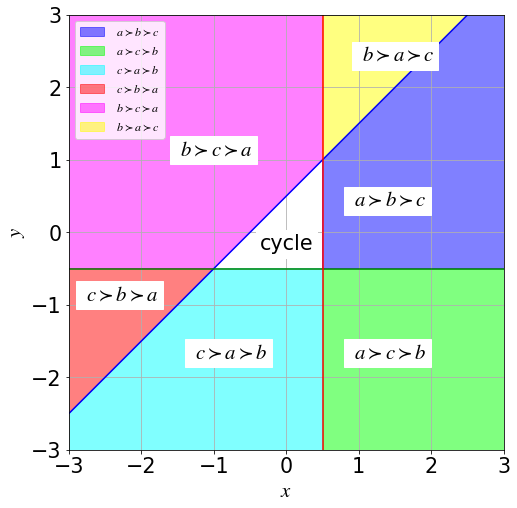

In [4]:

import numpy as np
# import itertools as it
import matplotlib.pyplot as plt
from IPython.display import display_markdown

def get_intersection(l0, l1):
    """
    2本の直線の交点を返す

    Parameters
    ----------
    l0 : 直線0 の方程式  l0[0] x + l0[1] y + l0[2] = 0 の係数
    l1 : 直線1 の方程式  l1[0] x + l1[1] y + l1[2] = 0 の係数

    Returns
    -------
    交点の座標を表す ndarray

    Notes
    -------
    交点がクロス積で表されることについては射影幾何学の文献を参照されたい

    References
    ------------
    金谷 健一, 「画像理解 -- ３次元認識の数理」 , 森北出版, 1990 (POD版 2011)
    """
    p = np.cross(l0, l1) # 
    p = p / p[2] 
    return p


def get_direction(line):
    """
    直線に平行な方向ベクトルを返す

    Parameters
    ----------
    line : 直線の方程式  l[0] x + l[1] y + l[2] = 0 の係数 l

    Returns
    -------
    直線に平行な方向ベクトルを表す ndarray
    """
    d = np.array([-line[1], line[0]])
    # print(d)
    d = d/np.linalg.norm(d)
    return d


def pref_str(p): 
    # return r' $\succ$ '.join(p)
    return ' $' + r' \succ '.join(p) + '$ '


def fn_line(l, x, y):
    """
    直線の方程式 l[0] x + l[1] y + l[2] = 0 の左辺に対応する関数 f(x, y)
    """
    return l[0]*x + l[1]*y + l[2]


def quad_area_poly(sgn, lb, l1, l2, p1, p2):
    """
    以下の3本の直線で囲まれる領域に対応する四辺形の頂点座標の配列を返す。
    - 点 p1 と p2 を通る直線 lc
    - l1 で表される直線
    - l2 で表される直線
    ただし，l1 と l2 に平行な方向ベクトルについて正負の不定性があるため，
    別の直線 lb と 符号 sgn の組合せによって領域を特定する。

    Parameters
    ----------
    sgn : 符号 (+1 または -1)
    lb : 直線の方程式  lb[0] x + lb[1] y + lb[2] = 0 の係数
    l1 : 直線の方程式  l1[0] x + l1[1] y + l1[2] = 0 の係数
    l2 : 直線の方程式  l2[0] x + l2[1] y + l2[2] = 0 の係数
    p1 : 点 p1 の座標
    p2 : 点 p2 の座標

    Returns
    -------
    arr : 四辺形の頂点座標の配列。 plt.fill(arr[:, 0], arr[:, 1]) で描画可能。

    Notes
    -----
    点 p1 と p2 が一致している場合に，上記領域の形状は四辺形でなく三角形となる
    """
    p1 = p1[0:2]
    p2 = p2[0:2]
    r = 10 # 図のサイズに対して十分に大きな数値

    n = sgn*lb[0:2]
    # print(n.shape)
    n = n/np.linalg.norm(n)
    # print(n)

    d1 = get_direction(l1)
    d2 = get_direction(l2)
    cos_th1 = (n @ d1)/(np.linalg.norm(n)*np.linalg.norm(d1))
    if cos_th1 < 0:
        d1 = -d1
    cos_th2 = (n @ d2)/(np.linalg.norm(n)*np.linalg.norm(d2))
    if cos_th2 < 0:
        d2 = -d2
    p1r = p1 + r*d1
    p2r = p2 + r*d2

    return np.vstack((p1r, p1, p2, p2r))


def draw_tau_lines(ax, gm, fill=False, symbol=r'\tau'):
    # line coefficients
    tau_ab = np.array([ 4, -4, 2*gm])
    tau_bc = np.array([ 0,  4, 2*gm])
    tau_ca = np.array([-4,  0, 2*gm])


    pt_int = np.vstack((get_intersection(tau_ab, tau_bc),
                        get_intersection(tau_bc, tau_ca),
                        get_intersection(tau_ca, tau_ab)))

    xp = np.linspace(-3.0, 3.0, 11)
    yp = np.linspace(-3.0, 3.0, 11)
    xx, yy = np.meshgrid(xp, yp)

    if fill:
        # Note: A fan is a degenerate quadrangle with two coincident vertices 
        if gm < 0:
            poly_abc = quad_area_poly(-1, tau_ca, tau_ab, tau_bc, pt_int[0], pt_int[0])
            poly_acb = quad_area_poly(+1, tau_ab, tau_bc, tau_ca, pt_int[0], pt_int[2])
            poly_cab = quad_area_poly(-1, tau_bc, tau_ca, tau_ab, pt_int[2], pt_int[2])
            poly_cba = quad_area_poly(+1, tau_ca, tau_ab, tau_bc, pt_int[2], pt_int[1])
            poly_bca = quad_area_poly(-1, tau_ab, tau_bc, tau_ca, pt_int[1], pt_int[1])
            poly_bac = quad_area_poly(+1, tau_bc, tau_ca, tau_ab, pt_int[1], pt_int[0])

        else:
            poly_abc = quad_area_poly(-1, tau_ca, tau_ab, tau_bc, pt_int[2], pt_int[1])
            poly_acb = quad_area_poly(+1, tau_ab, tau_bc, tau_ca, pt_int[1], pt_int[1])
            poly_cab = quad_area_poly(-1, tau_bc, tau_ca, tau_ab, pt_int[1], pt_int[0])
            poly_cba = quad_area_poly(+1, tau_ca, tau_ab, tau_bc, pt_int[0], pt_int[0])
            poly_bca = quad_area_poly(-1, tau_ab, tau_bc, tau_ca, pt_int[0], pt_int[2])
            poly_bac = quad_area_poly(+1, tau_bc, tau_ca, tau_ab, pt_int[2], pt_int[2])

        ax.fill(poly_abc[:, 0], poly_abc[:, 1], color='#0000ff7f', label=pref_str(geom_prefs[0]))
        ax.fill(poly_acb[:, 0], poly_acb[:, 1], color='#00ff007f', label=pref_str(geom_prefs[1]))
        ax.fill(poly_cab[:, 0], poly_cab[:, 1], color='#00ffff7f', label=pref_str(geom_prefs[2]))
        ax.fill(poly_cba[:, 0], poly_cba[:, 1], color='#ff00007f', label=pref_str(geom_prefs[3]))
        ax.fill(poly_bca[:, 0], poly_bca[:, 1], color='#ff00ff7f', label=pref_str(geom_prefs[4]))
        ax.fill(poly_bac[:, 0], poly_bac[:, 1], color='#ffff007f', label=pref_str(geom_prefs[5]))

    ax.legend(fontsize=12)

    if False:
        ax.set_frame_on(False)

    ax.contour(xp, yp, fn_line(tau_ab, xx, yy), levels=[0], colors=['blue'])
    ax.contour(xp, yp, fn_line(tau_bc, xx, yy), levels=[0], colors=['green'])
    ax.contour(xp, yp, fn_line(tau_ca, xx, yy), levels=[0], colors=['red'])

    pt_txt_pref = np.array([[1.4, 0.3],
                            [1.4, -1.8],
                            [-0.8, -1.8],
                            [-2.3, -1.0],
                            [-1.0, 1.0],
                            [1.5, 2.3]])
                            

    if False:
        for i, p in enumerate(geom_prefs):
                ax.annotate(pref_str(p), xy=pt_txt_pref[i],
                            xytext=(0, 0), textcoords='offset points',
                            horizontalalignment='center',
                            verticalalignment='bottom', fontsize='xx-large',
                            backgroundcolor='white')

    if False:
        if np.abs(gm) > 0.01:
            ax.annotate('cycle', xy=(0, -0.3),
                        xytext=(0, 0), textcoords='offset points',
                        horizontalalignment='center',
                        verticalalignment='bottom', fontsize='xx-large',
                        backgroundcolor='white')

    arrowprops = dict(mutation_scale=20,
                    linewidth=2,
                    arrowstyle='-|>',
                    color='k',
                    zorder=5)

    if symbol != None:
        ax.annotate(f'${symbol}(a, b) = 0$', xy=(1.5, 1.5+gm/2),
                    xytext=(-70, +50), textcoords='offset points',
                    horizontalalignment='center',
                    verticalalignment='bottom', fontsize='xx-large',
                    backgroundcolor='white', arrowprops=arrowprops)


        ax.annotate(f'${symbol}(b, c) = 0$', xy=(1.5, 0-gm/2),
                    xytext=(70, -50), textcoords='offset points',
                    horizontalalignment='center',
                    verticalalignment='bottom', fontsize='xx-large',
                    backgroundcolor='white', arrowprops=arrowprops)

        # ax.annotate(f'${symbol}(c, a) = 0$', xy=(gm/2, -2.0 + 0.5*gm),
        ax.annotate(f'${symbol}(c, a) = 0$', xy=(gm/2, -2.5 + 0.5*gm),
                    xytext=(70, -50), textcoords='offset points',
                    horizontalalignment='center',
                    verticalalignment='bottom', fontsize='xx-large',
                    backgroundcolor='white', arrowprops=arrowprops)


alternatives = ('a', 'b', 'c') 
geom_prefs = (('a', 'b', 'c'), # with Hamming distance = 1
              ('a', 'c', 'b'),
              ('c', 'a', 'b'),
              ('c', 'b', 'a'),
              ('b', 'c', 'a'),
              ('b', 'a', 'c'))

K3 = np.array([[ 1,  1,  1,  1,  1,  1]]).T
C3 = np.array([[ 1, -1,  1, -1,  1, -1]]).T
Ba = np.array([[ 1,  1,  0, -1, -1,  0]]).T
Bb = np.array([[ 0, -1, -1,  0,  1,  1]]).T
Bc = np.array([[-1,  0,  1,  1,  0, -1]]).T
Ra = np.array([[ 1,  1, -2,  1,  1, -2]]).T
Rb = np.array([[-2,  1,  1, -2,  1,  1]]).T
Rc = np.array([[ 1, -2,  1,  1, -2,  1]]).T

M = np.hstack((K3, C3, Ba, Bb, Ra, Rb))

if False:
    v = np.array([[3, 0, 0, 0, 4, 0]]).T
    # v = np.array([[4, 4, 4, 4, 4, 4]]).T
    vp = np.linalg.solve(M, v)
    # print('v = ', v)
    display_markdown(r'solution $v^{\prime}$ of $v = M v^{\prime}$ ' + f'  \n{vp}', raw=True)
    kp, gm, x, y, z, w = vp.ravel()
else:
    # kp, gm, x, y, z, w = (30, -3/2, 0, 0, 0, 0)
    # kp, gm, x, y, z, w = (30, 0, 0, 0, 0, 0)
    kp, gm, x, y, z, w = (30, 1, 0, 0, 0, 0)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'
plt.rcParams['text.usetex']  = False # check win32/win64 if any error. "---! c:/texlive/2021/texmf-var/web2c/pdftex/latex.fmt made by different executable version, strings are different"
plt.rcParams['text.latex.preamble']  = (
    r'\usepackage{amsmath, amssymb}' + '\n' +
    r'\usepackage[fontsize=16]{scrextend}')
plt.rcParams['font.size']  = 12.0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax.set_aspect('equal')
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.0, 3.0)
ax.set_xlabel('$x$', fontsize='xx-large')
ax.set_ylabel('$y$', fontsize='xx-large')
ax.grid()
# # ax.set_xticks([])
# # ax.set_yticks([])



draw_tau_lines(ax, gm, fill=True, symbol=None)

pt_txt_pref = np.array([[1.4, 0.3],
                        [1.4, -1.8],
                        [-0.8, -1.8],
                        [-2.3, -1.0],
                        [-1.0, 1.0],
                        [1.5, 2.3]])
                        

for i, p in enumerate(geom_prefs):
        ax.annotate(pref_str(p), xy=pt_txt_pref[i],
                    xytext=(0, 0), textcoords='offset points',
                    horizontalalignment='center',
                    verticalalignment='bottom', fontsize='xx-large',
                    backgroundcolor='white')

if np.abs(gm) > 0.01:
    ax.annotate('cycle', xy=(0, -0.3),
                xytext=(0, 0), textcoords='offset points',
                horizontalalignment='center',
                verticalalignment='bottom', fontsize='xx-large',
                backgroundcolor='white')

plt.savefig('prof_plane_basic_components.pdf', bbox_inches='tight')


#### コンドルセ-ヤング・ルールと二項独立性に関する図の作成
- コンドルセ-ヤング・ルールであっても二項独立性は成立しない

(3,)


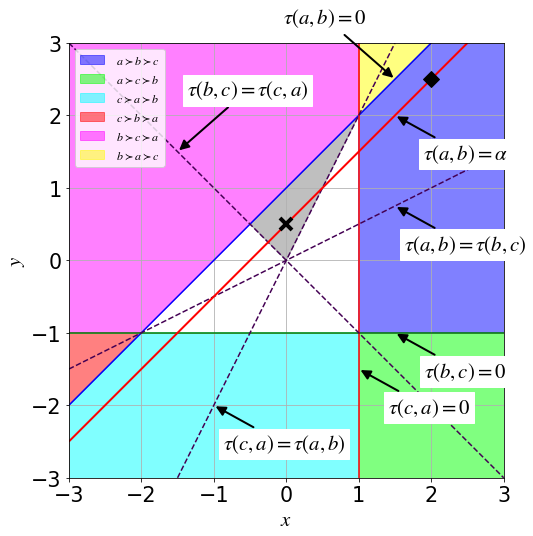

In [2]:
import numpy as np
import matplotlib.pyplot as plt

alternatives = ('a', 'b', 'c') 
geom_prefs = (('a', 'b', 'c'), # with Hamming distance = 1
              ('a', 'c', 'b'),
              ('c', 'a', 'b'),
              ('c', 'b', 'a'),
              ('b', 'c', 'a'),
              ('b', 'a', 'c'))





kp, gm, x, y, z, w = (30, 2, 0, 0, 0, 0)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'
plt.rcParams['text.usetex']  = False 
plt.rcParams['text.latex.preamble']  = (
    r'\usepackage{amsmath, amssymb}' + '\n' +
    r'\usepackage[fontsize=16]{scrextend}')
plt.rcParams['font.size']  = 12.0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax.set_aspect('equal')
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.0, 3.0)
ax.set_xlabel('$x$', fontsize='xx-large')
ax.set_ylabel('$y$', fontsize='xx-large')
ax.grid()

arrowprops = dict(mutation_scale=20,
                linewidth=2,
                arrowstyle='-|>',
                color='k',
                zorder=5)

# draw_tau_lines(ax, gm, fill=False)
draw_tau_lines(ax, gm, fill=True)

xp = np.linspace(-3.0, 3.0, 11)
yp = np.linspace(-3.0, 3.0, 11)
xx, yy = np.meshgrid(xp, yp)

tau_ab = np.array([ 4, -4, 2*gm])
tau_bc = np.array([ 0,  4, 2*gm])
tau_ca = np.array([-4,  0, 2*gm])

if False:
    ln_bc_ca = np.array([1, 1, 0])
    ln_ca_ab = np.array([2, -1, 0])
    ln_bc_ab = np.array([1, -2, 0])

else:
    ln_bc_ca = tau_bc - tau_ca
    ln_ca_ab = tau_ca - tau_ab
    ln_bc_ab = tau_bc - tau_ab

alpha = 2
tau_ab_alpha = np.hstack((tau_ab[:2], (tau_ab[2] - alpha))) 
print(tau_ab_alpha.shape)


ax.contour(xp, yp, fn_line(ln_bc_ca, xx, yy), levels=[0], linestyles=['dashed'])
ax.contour(xp, yp, fn_line(ln_ca_ab, xx, yy), levels=[0], linestyles=['dashed'])
ax.contour(xp, yp, fn_line(ln_bc_ab, xx, yy), levels=[0], linestyles=['dashed'])

ax.contour(xp, yp, fn_line(tau_ab_alpha, xx, yy), levels=[0], colors=['#ff0000ff'], linewidths=2)

pt_ann0 = get_intersection(tau_ab_alpha, np.array([1, 0, -1.5]))
ax.annotate(r'$\tau(a, b) = \alpha$', xy=pt_ann0[:2],
            xytext=(70, -50), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large',
            backgroundcolor='white', arrowprops=arrowprops)

pt_ann1 = get_intersection(ln_bc_ab, np.array([1, 0, -1.5]))
ax.annotate(r'$\tau(a, b) = \tau(b, c)$', xy=pt_ann1[:2],
            xytext=(70, -50), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large',
            backgroundcolor='white', arrowprops=arrowprops)

pt_ann2 = get_intersection(ln_ca_ab, np.array([1, 0, 1]))
ax.annotate(r'$\tau(c, a) = \tau(a, b)$', xy=pt_ann2[:2],
            xytext=(70, -50), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large',
            backgroundcolor='white', arrowprops=arrowprops)

pt_ann3 = get_intersection(ln_bc_ca, np.array([1, 0, 1.5]))
ax.annotate(r'$\tau(b, c) = \tau(c, a)$', xy=pt_ann3[:2],
            xytext=(70, 50), textcoords='offset points',
            horizontalalignment='center',
            verticalalignment='bottom', fontsize='xx-large',
            backgroundcolor='white', arrowprops=arrowprops)


pt_int = np.vstack((get_intersection(ln_bc_ca, ln_ca_ab),
                    get_intersection(ln_bc_ca, tau_ab),
                    get_intersection(ln_ca_ab, tau_ca)))

ax.fill(pt_int[:, 0], pt_int[:, 1], color='#7f7f7f7f')
# ax.plot(np.mean(pt_int[:, 0]), np.mean(pt_int[:, 1]), 'xk', markersize=12, )

pt_tgt = get_intersection(tau_ab_alpha, np.array([1, 0, 0]))
ax.plot(pt_tgt[0], pt_tgt[1], 'xk', markersize=12, markeredgewidth=4)

pt_dia = get_intersection(tau_ab_alpha, np.array([1, 0, -2]))
ax.plot(pt_dia[0], pt_dia[1], 'Dk', markersize=12, markeredgewidth=1)

plt.savefig('cyr_vs_bin_indep.pdf', bbox_inches='tight')

#### ペア多数決とボルダルールの集約結果のずれを表す図の作成

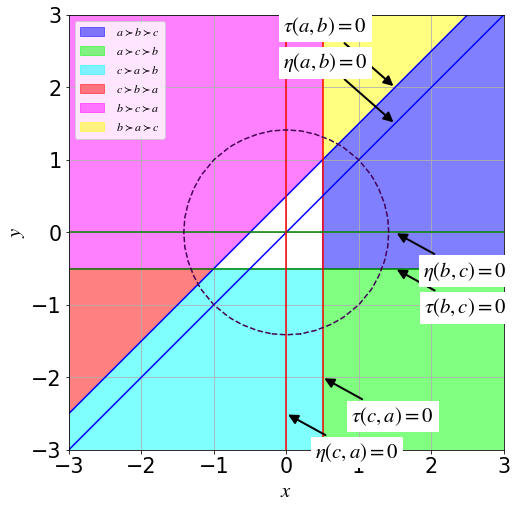

In [3]:

import numpy as np
import matplotlib.pyplot as plt

kp, gm, x, y, z, w = (30, 1, 0, 0, 0, 0)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'
plt.rcParams['text.usetex']  = False 
plt.rcParams['text.latex.preamble']  = (
    r'\usepackage{amsmath, amssymb}' + '\n' +
    r'\usepackage[fontsize=16]{scrextend}')
plt.rcParams['font.size']  = 12.0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax.set_aspect('equal')
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.0, 3.0)
ax.set_xlabel('$x$', fontsize='xx-large')
ax.set_ylabel('$y$', fontsize='xx-large')
ax.grid()

# arrowprops = dict(mutation_scale=20,
#                 linewidth=2,
#                 arrowstyle='-|>',
#                 color='k',
#                 zorder=5)

# draw_tau_lines(ax, gm, fill=False)
draw_tau_lines(ax, gm, fill=True)
draw_tau_lines(ax, 0, fill=False, symbol=r'\eta')

xp = np.linspace(-3.0, 3.0, 31)
yp = np.linspace(-3.0, 3.0, 31)
xx, yy = np.meshgrid(xp, yp)

def fn_circle(x, y, r):
    return r**2 - x**2 - y**2
r = np.sqrt(2)
ax.contour(xp, yp, fn_circle(xx, yy, r), levels=[0], linestyles='dashed')
plt.savefig('tau_eta_diff.pdf', bbox_inches='tight')